<a href="https://colab.research.google.com/github/VeldiHruthika/Task-8-Clustering-with-K-Means/blob/main/Task_8_Clustering_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering and evaluation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# **Load the Dataset**

In [2]:
# Load the Mall Customer Segmentation dataset
df = pd.read_csv("Mall_Customers.csv")

# Display the first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Data Preprocessing**

In [3]:
# Drop CustomerID column as it's not useful for clustering
df = df.drop('CustomerID', axis=1)

# Encode Gender if present
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Optional: Check the shape
print("Scaled data shape:", scaled_data.shape)

Scaled data shape: (200, 4)


# **Elbow Method to Determine Optimal K**

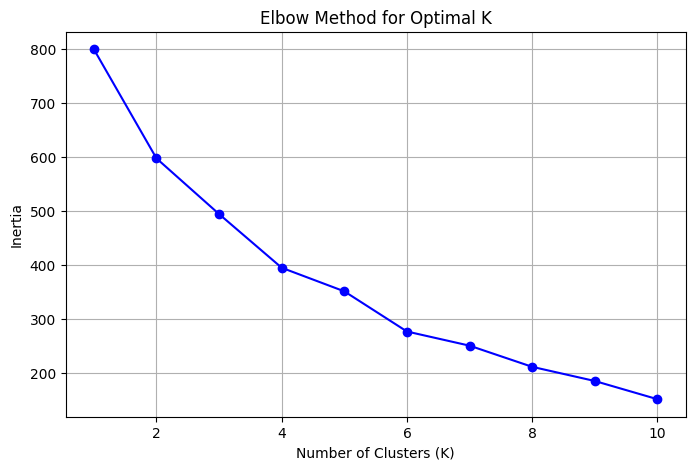

In [4]:
# Try different values of K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

# **Fit K-Means with Optimal K (e.g., K=5)**

In [5]:
# Let's say the elbow pointed to K=5
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# **Visualize Clusters using PCA (2D)**

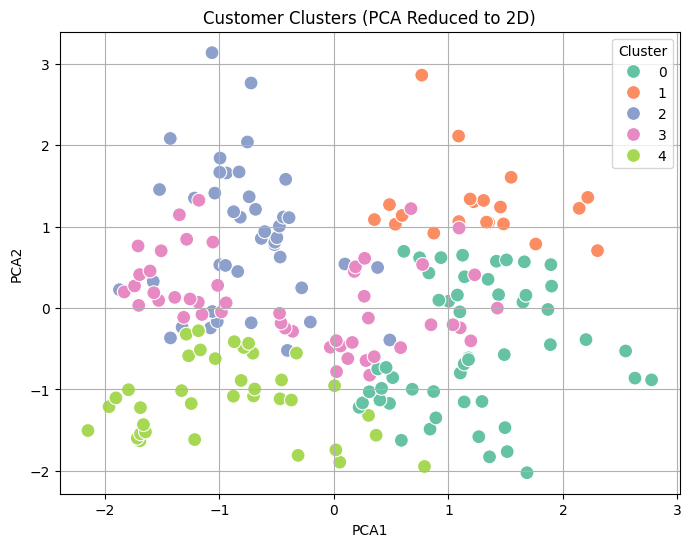

In [6]:
# Reduce dimensions to 2D for plotting
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Create a new DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=reduced_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Clusters (PCA Reduced to 2D)")
plt.grid(True)
plt.show()

# **Evaluate Clustering with Silhouette Score**

In [7]:
# Compute silhouette score to measure clustering quality
score = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.272
